In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns

### Table 1 downloading and refinement

The **Ras_SOCS.xlsx** file has been retrived from **UniProtKB** via the advanced search construction:<br>
**database:(type:pfam ras) database:(type:pfam socs_box)**

All the proteins found belong to diverse bilaterians.

In [2]:
table1 = pd.read_excel("./Ras_SOCS.xlsx")

In [3]:
table1.head()

Entry   Entry name                                      Protein names  \
0  Q96S21  RB40C_HUMAN  Ras-related protein Rab-40C (Rar-like protein)...   
1  P0C0E4  RB40L_HUMAN  Ras-related protein Rab-40A-like (Ras-like GTP...   
2  Q12829  RB40B_HUMAN  Ras-related protein Rab-40B (SOCS box-containi...   
3  Q8WXH6  RB40A_HUMAN  Ras-related protein Rab-40A (SOCS box-containi...   
4  Q8VHQ4  RB40C_MOUSE  Ras-related protein Rab-40C (SOCS box-containi...   

   Length Cross-reference (Pfam)              Organism  \
0     281       PF00071;PF07525;  Homo sapiens (Human)   
1     278       PF00071;PF07525;  Homo sapiens (Human)   
2     278       PF00071;PF07525;  Homo sapiens (Human)   
3     277       PF00071;PF07525;  Homo sapiens (Human)   
4     281       PF00071;PF07525;  Mus musculus (Mouse)   

  Taxonomic lineage (PHYLUM) Taxonomic lineage (CLASS)  \
0                   Chordata                  Mammalia   
1                   Chordata                  Mammalia   
2                   Chordata                  Mammalia   
3                   Chordata                  Mammalia   
4                   Chordata                  Mammalia   

  Taxonomic lineage (FAMILY) Taxonomic lineage (GENUS)  
0     Hominidae (great apes)                      Homo  
1     Hominidae (great apes)                      Homo  
2     Hominidae (great apes)                      Homo  
3     Hominidae (great apes)                      Homo  
4                    Muridae                       Mus

In [4]:
table1.shape

(1272, 10)

In [5]:
table1.isna().any()

Entry                         False
Entry name                    False
Protein names                 False
Length                        False
Cross-reference (Pfam)        False
Organism                      False
Taxonomic lineage (PHYLUM)    False
Taxonomic lineage (CLASS)      True
Taxonomic lineage (FAMILY)     True
Taxonomic lineage (GENUS)     False
dtype: bool

In [6]:
table1[table1["Taxonomic lineage (FAMILY)"].isna()]

Entry        Entry name             Protein names  Length  \
290   A0A7K9LXD8  A0A7K9LXD8_HYDTY  RB40C protein (Fragment)     281   
450   A0A7K9PR94  A0A7K9PR94_9CORV  RB40C protein (Fragment)     281   
466   A0A7K8CCV7  A0A7K8CCV7_9CORV  RB40C protein (Fragment)     281   
486   A0A7K8DFJ0  A0A7K8DFJ0_9CORV  RB40C protein (Fragment)     281   
565   A0A7K6F9I1  A0A7K6F9I1_9CORV  RB40C protein (Fragment)     281   
595   A0A7L3Z322  A0A7L3Z322_FREGA  RB40B protein (Fragment)     269   
732   A0A7K8HTP9  A0A7K8HTP9_9CORV  RB40C protein (Fragment)     281   
774   A0A7L3YX18  A0A7L3YX18_FREGA  RB40C protein (Fragment)     281   
1084  A0A7K8U173  A0A7K8U173_OCEOC  RB40C protein (Fragment)     281   
1202  A0A7K6LAI0  A0A7K6LAI0_9CORV  RB40C protein (Fragment)     281   
1260  A0A7K5VCA7  A0A7K5VCA7_9CORV  RB40C protein (Fragment)     281   

     Cross-reference (Pfam)  \
290        PF00071;PF07525;   
450        PF00071;PF07525;   
466        PF00071;PF07525;   
486        PF00071;PF07525;   
565        PF00071;PF07525;   
595        PF00071;PF07525;   
732        PF00071;PF07525;   
774        PF00071;PF07525;   
1084       PF00071;PF07525;   
1202       PF00071;PF07525;   
1260       PF00071;PF07525;   

                                               Organism  \
290   Hydrobates tethys (Wedge-rumped storm-petrel) ...   
450   Pachycephala philippinensis (yellow-belllied w...   
466                              Rhagologus leucostigma   
486        Eulacestoma nigropectus (wattled ploughbill)   
565         Daphoenositta chrysoptera (varied sittella)   
595   Fregetta grallaria (White-bellied storm-petrel...   
732         Aleadryas rufinucha (rufous-naped whistler)   
774   Fregetta grallaria (White-bellied storm-petrel...   
1084  Oceanites oceanicus (Wilson's storm petrel) (P...   
1202          Falcunculus frontatus (Eastern shriketit)   
1260                               Platysteira castanea   

     Taxonomic lineage (PHYLUM) Taxonomic lineage (CLASS)  \
290                    Chordata                      Aves   
450                    Chordata                      Aves   
466                    Chordata                      Aves   
486                    Chordata                      Aves   
565                    Chordata                      Aves   
595                    Chordata                      Aves   
732                    Chordata                      Aves   
774                    Chordata                      Aves   
1084                   Chordata                      Aves   
1202                   Chordata                      Aves   
1260                   Chordata                      Aves   

     Taxonomic lineage (FAMILY) Taxonomic lineage (GENUS)  
290                         NaN                Hydrobates  
450                         NaN              Pachycephala  
466                         NaN                Rhagologus  
486                         NaN               Eulacestoma  
565                         NaN             Daphoenositta  
595                         NaN                  Fregetta  
732                         NaN                 Aleadryas  
774                         NaN                  Fregetta  
1084                        NaN                 Oceanites  
1202                        NaN               Falcunculus  
1260                        NaN             Dyaphorophyia

A few entries with unidentified families in the large class Aves are safe to be ignored, they will simply not be accounted for during across-families sampling.

In [7]:
table1[table1["Taxonomic lineage (CLASS)"].isna()]

Entry        Entry name  \
25        K7G1B8      K7G1B8_PELSI   
42        K7FIM4      K7FIM4_PELSI   
45        K7FIM8      K7FIM8_PELSI   
132   A0A452IZK9  A0A452IZK9_9SAUR   
308   A0A4D9E0G6  A0A4D9E0G6_9SAUR   
404   A0A674K2A8  A0A674K2A8_TERCA   
433   A0A674I0V9  A0A674I0V9_TERCA   
476   A0A4D9E7H5  A0A4D9E7H5_9SAUR   
488   A0A7M4E1H1  A0A7M4E1H1_CROPO   
489   A0A7M4FVE7  A0A7M4FVE7_CROPO   
550       M7BU19      M7BU19_CHEMY   
762   A0A151N751  A0A151N751_ALLMI   
769   A0A151NVA0  A0A151NVA0_ALLMI   
1106  A0A1U7S645  A0A1U7S645_ALLSI   
1109  A0A3Q0H1P6  A0A3Q0H1P6_ALLSI   
1201  A0A452IP11  A0A452IP11_9SAUR   
1216  A0A452IPK6  A0A452IPK6_9SAUR   

                                      Protein names  Length  \
25               SOCS box domain-containing protein     278   
42               SOCS box domain-containing protein     281   
45               SOCS box domain-containing protein     219   
132              RAB40B, member RAS oncogene family     278   
308                     Ras-related protein Rab-40C     285   
404              RAB40B, member RAS oncogene family     278   
433              RAB40C, member RAS oncogene family     275   
476   Inactive serine/threonine-protein kinase VRK3     278   
488              RAB40C, member RAS oncogene family     285   
489              RAB40B, member RAS oncogene family     236   
550                     Ras-related protein Rab-40C     537   
762                     Ras-related protein Rab-40C     281   
769                     Ras-related protein Rab-40B     277   
1106                    ras-related protein Rab-40C     285   
1109                    ras-related protein Rab-40B     315   
1201             RAB40C, member RAS oncogene family     273   
1216             RAB40C, member RAS oncogene family     285   

     Cross-reference (Pfam)  \
25         PF00071;PF07525;   
42         PF00071;PF07525;   
45         PF00071;PF07525;   
132        PF00071;PF07525;   
308        PF00071;PF07525;   
404        PF00071;PF07525;   
433        PF00071;PF07525;   
476        PF00071;PF07525;   
488        PF00071;PF07525;   
489        PF00071;PF07525;   
550        PF00071;PF07525;   
762        PF00071;PF07525;   
769        PF00071;PF07525;   
1106       PF00071;PF07525;   
1109       PF00071;PF07525;   
1201       PF00071;PF07525;   
1216       PF00071;PF07525;   

                                               Organism  \
25    Pelodiscus sinensis (Chinese softshell turtle)...   
42    Pelodiscus sinensis (Chinese softshell turtle)...   
45    Pelodiscus sinensis (Chinese softshell turtle)...   
132      Gopherus agassizii (Agassiz's desert tortoise)   
308       Platysternon megacephalum (big-headed turtle)   
404   Terrapene carolina triunguis (Three-toed box t...   
433   Terrapene carolina triunguis (Three-toed box t...   
476       Platysternon megacephalum (big-headed turtle)   
488   Crocodylus porosus (Saltwater crocodile) (Estu...   
489   Crocodylus porosus (Saltwater crocodile) (Estu...   
550   Chelonia mydas (Green sea-turtle) (Chelonia ag...   
762     Alligator mississippiensis (American alligator)   
769     Alligator mississippiensis (American alligator)   
1106             Alligator sinensis (Chinese alligator)   
1109             Alligator sinensis (Chinese alligator)   
1201     Gopherus agassizii (Agassiz's desert tortoise)   
1216     Gopherus agassizii (Agassiz's desert tortoise)   

     Taxonomic lineage (PHYLUM) Taxonomic lineage (CLASS)  \
25                     Chordata                       NaN   
42                     Chordata                       NaN   
45                     Chordata                       NaN   
132                    Chordata                       NaN   
308                    Chordata                       NaN   
404                    Chordata                       NaN   
433                    Chordata                       NaN   
476                    Chordata                       NaN   
488                 

It appeares that all the entries with unidentified class names are either crocodiles, or turtles. Then they can be united under **Archosauromorpha** name:

In [8]:
table1.loc[table1[table1["Taxonomic lineage (CLASS)"].isna()].index, "Taxonomic lineage (CLASS)"] = "Archosauromorpha"
table1["Taxonomic lineage (CLASS)"].unique()

array(['Mammalia', 'Insecta', 'Aves', 'Actinopteri',
       'Lepidosauria (lepidosaurs)', 'Archosauromorpha', 'Chondrichthyes',
       'Amphibia', 'Arachnida', 'Clitellata', 'Coelacanthimorpha',
       'Hyperoartia', 'Branchiopoda', 'Lingulata', 'Chromadorea',
       'Malacostraca', 'Gastropoda', 'Polychaeta (polychaetes)',
       'Bivalvia', 'Collembola (springtails)', 'Echinoidea (sea urchins)',
       'Cephalopoda (cephalopods)', 'Chilopoda (centipedes)',
       'Hexanauplia'], dtype=object)

In [9]:
table1[table1["Cross-reference (Pfam)"] != "PF00071;PF07525;"].shape[0]

9

The advanced search construction used to retrieve the table1 sequences, in fact, finds all the proteins having the 2 queried domains, but doesn't pay attention to the presence of any other domains in the found proteins. The extra domains may be mixed up with the 2 target domains in the proteins found. Moreover, in some of the found two-domain proteins the order of domains may be inverted. However, a multidomain protein may be homologous to the target two-domain proteins if the extra domain was added to N- or C-term of the two-domain architecture during a recent evolutinary event.<br>
Thus it's hard to discern non-homologues in the table. Since there are only 9 extra domain proteins in the table and some of them may be homologous to the target architecture, it has been decided to retain them, as it could make no great bias.

### Protein length histogram

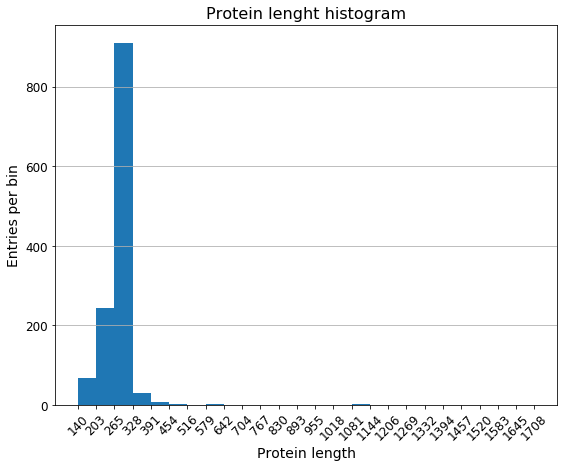

In [10]:
plt.figure(figsize=[9, 7])
a = plt.hist(table1["Length"], bins=25, density=False)
plt.xticks(a[1], rotation=45, size=12)
plt.yticks(size=12)
plt.xlabel("Protein length", size=14)
plt.ylabel("Entries per bin", size=14)
plt.grid(True, axis="y")
plt.title("Protein lenght histogram", size=16)

plt.show(a)

### Sampling proteins with typical length

Based on the histogram above, proteins with the length range from 200 to 330 aa are further considered as of typical length:

In [10]:
typical = table1[(table1["Length"] > 200) & (table1["Length"] < 330)]

In [11]:
typical["Taxonomic lineage (PHYLUM)"].nunique(),\
typical["Taxonomic lineage (CLASS)"].nunique(), typical["Taxonomic lineage (FAMILY)"].nunique()

(7, 23, 344)

In [12]:
typical["Taxonomic lineage (CLASS)"].value_counts()

Aves                          322
Mammalia                      296
Actinopteri                   270
Insecta                       166
Lepidosauria (lepidosaurs)     20
Arachnida                      17
Archosauromorpha               16
Amphibia                       10
Chromadorea                     9
Chondrichthyes                  7
Malacostraca                    3
Gastropoda                      3
Polychaeta (polychaetes)        2
Hyperoartia                     2
Cephalopoda (cephalopods)       2
Bivalvia                        2
Collembola (springtails)        2
Lingulata                       1
Hexanauplia                     1
Echinoidea (sea urchins)        1
Branchiopoda                    1
Coelacanthimorpha               1
Chilopoda (centipedes)          1
Name: Taxonomic lineage (CLASS), dtype: int64

A small sample of proteins of typical length for HMM profile building is being collected with special attention to taxonomic diversity:

In [13]:
sampled_AC = []

random.seed(7)
for cl in typical["Taxonomic lineage (CLASS)"].unique():
    cl_table = typical[typical["Taxonomic lineage (CLASS)"] == cl]
    if cl_table.shape[0] <= 3:
        sampled_AC += list(cl_table["Entry"])
    else:
        if cl_table["Taxonomic lineage (FAMILY)"].nunique() < 3:
            entries = list(cl_table["Entry"])
            random.shuffle(entries)
            sampled_AC += entries[:3]
        else:
            families = list(cl_table["Taxonomic lineage (FAMILY)"].unique())
            random.shuffle(families)
            families = families[:3]
            for fam in families:
                entries = list(cl_table[cl_table["Taxonomic lineage (FAMILY)"] == fam]["Entry"])
                sampled_AC.append(random.choice(entries))
random.seed()

del typical
        
len(sampled_AC)

52

In [14]:
table1["Sampled"] = table1["Entry"].apply(lambda x: x in sampled_AC)

table1.to_excel("tables.xlsx", sheet_name="table_1", index=False)

Retrieving sampled sequences from **UniProt**:

In [16]:
for AC in sampled_AC:
    !wsl wget https://www.uniprot.org/uniprot/{AC}.fasta
!wsl cat ./*.fasta > sample.fa
!wsl rm ./*.fasta

--2021-09-25 12:59:41--  https://www.uniprot.org/uniprot/A0A5F4D234.fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 393 [text/plain]
Saving to: вЂ�A0A5F4D234.fastaвЂ™

     0K                                                       100% 14.7M=0s

2021-09-25 12:59:44 (14.7 MB/s) - вЂ�A0A5F4D234.fastaвЂ™ saved [393/393]

--2021-09-25 12:59:44--  https://www.uniprot.org/uniprot/A0A2U3W4Z5.fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 397 [text/plain]
Saving to: вЂ�A0A2U3W4Z5.fastaвЂ™

     0K                                                       100% 14.8M=0s

2021-09-25 12:59:44 (14.8 MB/s) - вЂ�A0A2U3W4Z5.fastaвЂ™ saved [397/397]

--2021-09-25 12:59:44--  https://www.uniprot.org/uniprot

--2021-09-25 12:59:51--  https://www.uniprot.org/uniprot/A0A401S8S3.fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 456 [text/plain]
Saving to: вЂ�A0A401S8S3.fastaвЂ™

     0K                                                       100% 14.7M=0s

2021-09-25 12:59:52 (14.7 MB/s) - вЂ�A0A401S8S3.fastaвЂ™ saved [456/456]

--2021-09-25 12:59:52--  https://www.uniprot.org/uniprot/A0A401NXM8.fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 436 [text/plain]
Saving to: вЂ�A0A401NXM8.fastaвЂ™

     0K                                                       100% 18.2M=0s

2021-09-25 12:59:52 (18.2 MB/s) - вЂ�A0A401NXM8.fastaвЂ™ saved [436/436]

--2021-09-25 12:59:52--  https://www.uniprot.org/uniprot

--2021-09-25 12:59:59--  https://www.uniprot.org/uniprot/A0A5B7CUE5.fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 370 [text/plain]
Saving to: вЂ�A0A5B7CUE5.fastaвЂ™

     0K                                                       100% 33.0M=0s

2021-09-25 12:59:59 (33.0 MB/s) - вЂ�A0A5B7CUE5.fastaвЂ™ saved [370/370]

--2021-09-25 12:59:59--  https://www.uniprot.org/uniprot/A0A0P4WIA7.fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 384 [text/plain]
Saving to: вЂ�A0A0P4WIA7.fastaвЂ™

     0K                                                       100% 12.2M=0s

2021-09-25 12:59:59 (12.2 MB/s) - вЂ�A0A0P4WIA7.fastaвЂ™ saved [384/384]

--2021-09-25 13:00:00--  https://www.uniprot.org/uniprot

Adjusting retrieved sequence names:

In [17]:
!wsl sed -i -r "/>/s/^>(sp|tr)\|(.+)\|.+$/>\2/" ./sample.fa

### Alignment of sampled sequences and HMM profile building

The alignment has been performed with the **MAFFT v7.475** program. As the domains of interest are situated quite closely to each other, in one conservative protein region, **L-INS-I** algorithm has been used:

*In Unix cmd:*<br>
**linsi sample.fa > alignment.afa**

The obtained alignment then has been refined manually using the **Jalview** editor:<br>
N-end has been trimmed up to the 99th position, C-end seems to be conservative, thus has remained untrimmed, sequences 25, 39, 47, 48 and 24, 31, 42, 8 have been removed as having non-conservative N- or C-terms respectively. Sequences containing internal insertions have been retained.<br>
Tht resulting alignment is in the **refined_alignment.afa** file.

The HMM profile, configured for global alignment finding, has been built with **hmm2build** from the **HMMER 2.3.2** package:

*In Unix cmd:*<br>
**hmm2build -g -n Ras_SOCS ras_socs.hmm refined_alignment.afa**

Then it has been calibrated with default settings:

*In Unix cmd:*<br>
**hmm2calibrate --cpu 1 ras_socs.hmm**

### HMM profile testing

To find out the cutoff score with reasonable sensitivity to specificity ratio for the built HMM profile, the **SOCS.fasta** file, containing all the SOCS_box domain protein sequences of metazoan origin, has been retrieved from **UniProtKB** via the advanced search construction:<br>
**database:(type:pfam socs_box) taxonomy:"Metazoa [33208]"**

Adjusting retrieved sequence names:

In [26]:
!wsl sed -i -r "/>/s/^>(sp|tr)\|(.+)\|.+$/>\2/" ./SOCS.fasta

Next, search for the domain architectures, encoded by the built HMM profile, has been undertaken in the retrieved proteins via **hmm2search** from the **HMMER 2.3.2** package:

*In Unix cmd:*<br>
**hmm2search --cpu 1 -E 10 ras_socs.hmm SOCS.fasta > results.txt**

Such a high E-value has been taken as it was previously shown that -E 0.1 gives an output just 2 sequences longer than the table1, which may be useless for profile testing (data not shown). 

Adjusing the output to tsv format and downloading it:

In [77]:
!wsl sed -r -e '1,/Parsed for domains/d' -e '/Alignments of top-scoring domains/,$d' -e '/-----/d' results.txt |\
wsl sed -r  's/ +/\t/g' | wsl sed -r -e '1s/(seq-t\t)/\1coverage_seq\t/' -e '1s/(hmm-t\t)/\1coverage_hmm\t/' > results.tsv

In [78]:
table2 = pd.read_csv("./results.tsv", sep="\t")

Marking the true findings in the output: 

In [79]:
table1_AC = list(table1["Entry"])

table2["in_table1"] = table2["Sequence"].apply(lambda x: x in table1_AC)

del table1_AC

Sorting table2 by score increase and calculating **Sensitivity** and **Specificity** values for each score (as if it were taken as a cutoff):

In [80]:
table2 = table2.sort_values(by="score", ascending=False).reset_index(drop=True)

seq_num = !wsl grep -c ">" SOCS.fasta
seq_num = int(seq_num[0])
good_seq_num = table1.shape[0]
bad_seq_num = seq_num - good_seq_num
rejected_bad_seq_num = bad_seq_num - (~table2["in_table1"]).agg(np.sum)

#Sensitivity|cutoff = TP|cutoff / (TP + FN)
table2["Sensitivity"] = [table2["in_table1"][:n].agg(np.sum) / good_seq_num for n in table2.index]

#Specificity|cutoff = TN|cutoff / (TN + FP)
table2["Specificity"] = [((~table2["in_table1"][n:]).agg(np.sum) + rejected_bad_seq_num) / bad_seq_num for n in table2.index]

In [82]:
with pd.ExcelWriter("tables.xlsx", engine="openpyxl", mode="a") as writer:
    table2.to_excel(writer, sheet_name="table_2", index=False)

**ROC curve:**

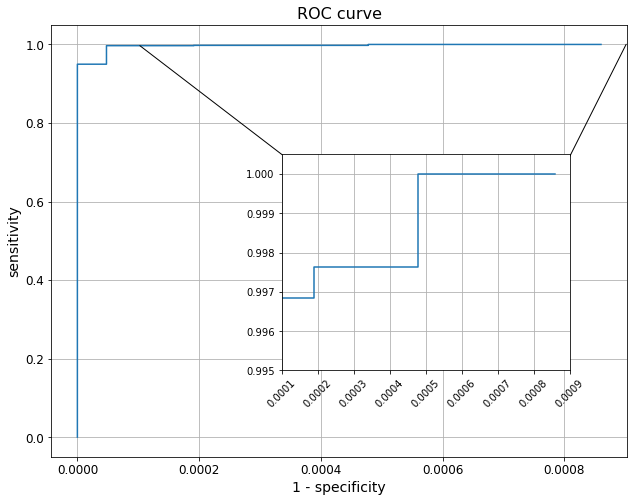

In [83]:
fig = plt.figure(figsize=[8, 6])

big_ax = fig.add_axes([0, 0, 1, 1])
big_ax.plot(1 - table2["Specificity"], table2["Sensitivity"])
big_ax.grid(True)
plt.xticks(size=12)
plt.yticks(size=12)
big_ax.set_xlabel("1 - specificity", size=14)
big_ax.set_ylabel("sensitivity", size=14)
plt.annotate("", xy=(0.0001, 1), xytext=(0.00035, 0.703), arrowprops=dict(arrowstyle="-"))
plt.annotate("", xy=(0.000903, 1.005), xytext=(0.000805, 0.703), arrowprops=dict(arrowstyle="-"))
plt.title("ROC curve", size=16)

small_ax = fig.add_axes([0.4, 0.2, 0.5, 0.5])
small_ax.plot(1 - table2["Specificity"], table2["Sensitivity"])
small_ax.set_xlim(0.0001, 0.0009)
small_ax.set_ylim(0.9950, 1.0005)
plt.xticks(rotation=45)
plt.yticks(np.arange(995, 1001)/1000)
small_ax.grid(True)

plt.show()

From the curve above it is evident that it takes only a negligibly small decrease in specificity to reach 100% sensitivity. So, any reasonable score cutoff, resulting in 100% sensitivity, would also have almost perfect specificity. Conversely, score cutoff with almost 100% specificity would result in >95% sensitivity. The profile is inherently both very sensitive and very specific. 

Defining the score cutoff:

The first finding, absent from table1, (**A0A3M0KYX4**) has a distinctly high score and is followed by a number of findings with the target architecture (i.e. present in table1). According to **InterPro** annotation, **A3M0KYX4** has Rab domain and SOCS-box domain; since Rab is a subfamily of Ras family and many proteins from table1 are annotated as somewhat like "Ras-related Rab protein", this protein may still be considered to have the target domain architecture. **Pfam** profile for Ras seems to be sensitive to the whole family, so it is quite unexpectedly to find the Ras domain unidentified by **Pfam** in this protein . The bulk of non-homologous findings starts, however, after the score falls below **58**:

In [84]:
table2[table2["in_table1"] == False].head(10)

Sequence Domain  seq-f  seq-t coverage_seq  hmm-f  hmm-t coverage_hmm  \
1208  A0A3M0KYX4    1/1     13    334           .]      1    277           []   
1269  A0A7J8F2Z4    1/1      1    132           []      1    277           []   
1270  A0A6J2Q4P7    1/1      1    130           []      1    277           []   
1271      G3HBT5    1/1      1    132           []      1    277           []   
1273  A0A0S7KI55    1/1      1    137           [.      1    277           []   
1274  A0A161M281    1/1      1    141           [.      1    277           []   
1275  A0A151WU20    1/1     15    157           .]      1    277           []   
1276  A0A026X0B4    1/1     15    157           .]      1    277           []   
1277      G9KJU2    1/1      1    118           []      1    277           []   
1278  A0A084VQ85    1/1      1    119           []      1    277           []   

      score       E-value  in_table1  Sensitivity  Specificity  
1208  332.9  1.300000e-96      False     0.949686     1.000000  
1269   57.6  1.000000e-13      False     0.996855     0.999952  
1270   57.4  1.200000e-13      False     0.996855     0.999904  
1271   56.7  1.900000e-13      False     0.996855     0.999857  
1273   36.9  1.300000e-07      False     0.997642     0.999809  
1274   21.2  1.400000e-06      False     0.997642     0.999761  
1275   17.3  2.500000e-06      False     0.997642     0.999713  
1276   16.7  2.800000e-06      False     0.997642     0.999665  
1277  -13.8  2.600000e-04      False     0.997642     0.999618  
1278  -38.9  1.100000e-02      False     0.997642     0.999570

However, there are some target findings with score below **58**. **A0A6I9Y2F8** (score = 48.6) has been manually verified to have the target architecture in agreement with its placing in table1. Nevertheless, the next finding, **A0A7G3AK77**, (score = -54.3), though being present in table1, has inversed domain architecture (SOCS+Ras), so is not a target finding: 

In [85]:
table2[table2["in_table1"] == True].tail(10)

Sequence Domain  seq-f  seq-t coverage_seq  hmm-f  hmm-t coverage_hmm  \
1263  A0A1A8QE17    1/1      1    178           []      1    277           []   
1264  A0A6F9CNY3    1/1      1    173           []      1    277           []   
1265  A0A2F0B2A4    1/1      1    165           []      1    277           []   
1266  A0A212D9G6    1/1      1    164           []      1    277           []   
1267      T1EH04    1/1      1    140           []      1    277           []   
1268  A0A7L3NTX1    1/1      1    147           []      1    277           []   
1272  A0A6I9Y2F8    1/1      1    151           []      1    277           []   
1279  A0A7G3AK77    1/1    824   1082           .]      1    277           []   
1280  A0A1B0CEK5    1/1    819   1077           .]      1    277           []   
1281  A0A7G3AIX4    1/1    824   1082           .]      1    277           []   

      score       E-value  in_table1  Sensitivity  Specificity  
1263  196.4  1.700000e-55       True     0.992138     0.999952  
1264  171.8  4.300000e-48       True     0.992925     0.999952  
1265  158.5  4.200000e-44       True     0.993711     0.999952  
1266  157.8  6.800000e-44       True     0.994497     0.999952  
1267  155.8  2.900000e-43       True     0.995283     0.999952  
1268  134.1  9.600000e-37       True     0.996069     0.999952  
1272   48.6  5.100000e-11       True     0.996855     0.999809  
1279  -54.3  1.100000e-01       True     0.997642     0.999522  
1280  -54.3  1.100000e-01       True     0.998428     0.999522  
1281  -54.3  1.100000e-01       True     0.999214     0.999522

There is a steep score decrease after a rather common value of score = 325. However, there are a lot of target findings below this score and sequences with the mentioned stereotypic score = 325 all seem to belong to the large class of Aves (just numerous homologues):

In [86]:
table2.iloc[1220:1245, :]

Sequence Domain  seq-f  seq-t coverage_seq  hmm-f  hmm-t coverage_hmm  \
1220  A0A7L3I4C8    1/1      1    194           []      1    277           []   
1221  A0A7K7HUQ1    1/1      1    194           []      1    277           []   
1222  A0A7L2XGY4    1/1      1    194           []      1    277           []   
1223  A0A7L4DVJ4    1/1      1    194           []      1    277           []   
1224  A0A7K5YSE0    1/1      1    194           []      1    277           []   
1225  A0A7K7DDB7    1/1      1    194           []      1    277           []   
1226  A0A7L0X7Z0    1/1      1    194           []      1    277           []   
1227  A0A7K7FFT3    1/1      1    194           []      1    277           []   
1228  A0A7L3ADR1    1/1      1    194           []      1    277           []   
1229  A0A7K7MDG2    1/1      1    194           []      1    277           []   
1230  A0A7L4KDS1    1/1      1    194           []      1    277           []   
1231  A0A7K7EJE2    1/1      1    194           []      1    277           []   
1232      R0JDU6    1/1      1    194           []      1    277           []   
1233  A0A7L0WC06    1/1      1    194           []      1    277           []   
1234  A0A6J0YP95    1/1     34    272           .]      1    277           []   
1235  A0A6G1AZS0    1/1      1    194           []      1    277           []   
1236      G8F5M2    1/1      1    194           []      1    277           []   
1237  A0A2P4S8U1    1/1      1    193           []      1    277           []   
1238  A0A0P7UWS7    1/1      1    190           []      1    277           []   
1239  A0A5G2Q6P1    1/1      6    260           .]      1    277           []   
1240  A0A341CPD7    1/1      1    227           []      1    277           []   
1241      F1S008    1/1     40    290           .]      1    277           []   
1242  A0A2U4C4H4    1/1      1    227           []      1    277           []   
1243  A0A7L3JEP5    1/1      1    181           []      1    277           []   
1244  A0A7L2IP12    1/1      1    181           []      1    277           []   

      score       E-value  in_table1  Sensitivity  Specificity  
1220  325.7  2.000000e-94       True     0.958333     0.999952  
1221  325.7  2.000000e-94       True     0.959119     0.999952  
1222  325.7  2.000000e-94       True     0.959906     0.999952  
1223  325.7  2.000000e-94       True     0.960692     0.999952  
1224  325.7  2.000000e-94       True     0.961478     0.999952  
1225  325.7  2.000000e-94       True     0.962264     0.999952  
1226  325.7  2.000000e-94       True     0.963050     0.999952  
1227  325.7  2.000000e-94       True     0.963836     0.999952  
1228  325.7  2.000000e-94       True     0.964623     0.999952  
1229  325.7  2.000000e-94       True     0.965409     0.999952  
1230  325.7  2.000000e-94       True     0.966195     0.999952  
1231  325.7  2.000000e-94       True     0.966981     0.999952  
1232  325.7  2.000000e-94       True     0.967767     0.999952  
1233  325.7  2.000000e-94       True     0.968553     0.999952  
1234  325.4  2.400000e-94       True     0.969340     0.999952  
1235  324.7  4.100000e-94       True     0.970126     0.999952  
1236  322.1  2.500000e-93       True     0.970912     0.999952  
1237  320.3  8.600000e-93       True     0.971698     0.999952  
1238  310.6  7.000000e-90       True     0.972484     0.999952  
1239  310.5  7.500000e-90       True     0.973270     0.999952  
1240  307.3  6.700000e-89       True     0.974057     0.999952  
1241  306.1  1.600000e-88       True     0.974843     0.999952  
1242  304.2  5.900000e-88       True     0.975629     0.999952  
1243  296.6  1.100000e-85       True     0.976415     0.999952  
1244  296.1  1.600000e-85       True     0.977201     0.999952

**Score decline graph:**

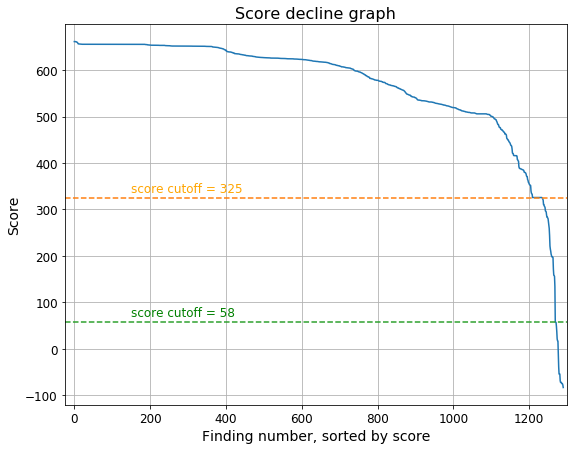

In [87]:
fig = plt.figure(figsize=[9, 7])

plt.plot(table2.index, table2["score"])
plt.plot([-25, 1300], [325, 325], linestyle="--")
plt.plot([-25, 1300], [58, 58], linestyle="--")
plt.xlim(-25, 1300)
plt.xticks(size=12)
plt.yticks(size=12)
plt.text(150, 337, "score cutoff = 325", fontsize=12, color="orange")
plt.text(150, 70, "score cutoff = 58", fontsize=12, color="green")
plt.xlabel("Finding number, sorted by score", size=14)
plt.ylabel("Score", size=14)
plt.grid(True)
plt.title("Score decline graph", size=16)


plt.show()

So there could be defined the two cutoffs: a strict one (**score > 325**), based on the steep step on the Score decline graph, and a relaxed one (**score > 58**), based on the score of the second false finding. The relaxed cutoff seems better (more sensitive, than the strict one, though equally specific), which is quite explicit from the confusion matrices below:

Confusion matrix for the strict cutoff (**score cutoff = 325**):

In [88]:
conf_matrix_strict = pd.DataFrame({"in table_1":[table2[table2["score"] > 325]["in_table1"].agg(np.sum),
                                    table2[table2["score"] <= 325]["in_table1"].agg(np.sum)],
                            "not in table_1":[(~table2[table2["score"] > 325]["in_table1"]).agg(np.sum),
                                     (~table2[table2["score"] <= 325]["in_table1"]).agg(np.sum)]},
                           index=["predicted with hmm", "not predicted with hmm"])
conf_matrix_strict

in table_1  not in table_1
predicted with hmm            1234               1
not predicted with hmm          38              18

In [89]:
with pd.ExcelWriter("tables.xlsx", engine="openpyxl", mode="a") as writer:
    conf_matrix_strict.to_excel(writer, sheet_name="score_cutoff_325", index=True)

Confusion matrix for the relaxed cutoff (**score cutoff = 58**):

In [90]:
conf_matrix_relaxed = pd.DataFrame({"in table_1":[table2[table2["score"] > 58]["in_table1"].agg(np.sum),
                                    table2[table2["score"] <=58]["in_table1"].agg(np.sum)],
                            "not in table_1":[(~table2[table2["score"] > 58]["in_table1"]).agg(np.sum),
                                     (~table2[table2["score"] <= 58]["in_table1"]).agg(np.sum)]},
                           index=["predicted with hmm", "not predicted with hmm"])
conf_matrix_relaxed

in table_1  not in table_1
predicted with hmm            1268               1
not predicted with hmm           4              18

In [92]:
with pd.ExcelWriter("tables.xlsx", engine="openpyxl", mode="a") as writer:
    conf_matrix_relaxed.to_excel(writer, sheet_name="score_cutoff_58", index=True)

**Analysis complete**